#### 결정 트리

In [38]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [39]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size = 0.2, random_state = 2022
)

In [40]:
dtc = DecisionTreeClassifier(random_state = 156)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [41]:
from sklearn.tree import export_graphviz


In [42]:
export_graphviz(dtc, out_file = 'tree.dot', feature_names=iris.feature_names, class_names=iris.target_names,
               impurity = True, filled = True)

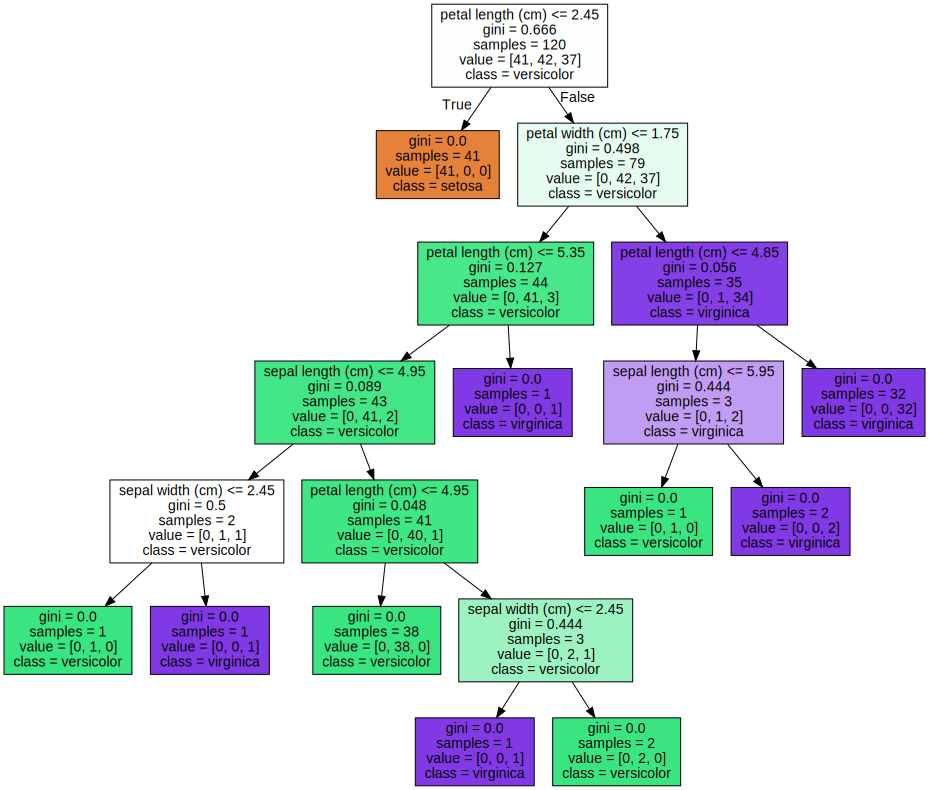

In [43]:
import graphviz

with open('tree.dot') as file:
  dot_graph = file.read()
graphviz.Source(dot_graph)

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

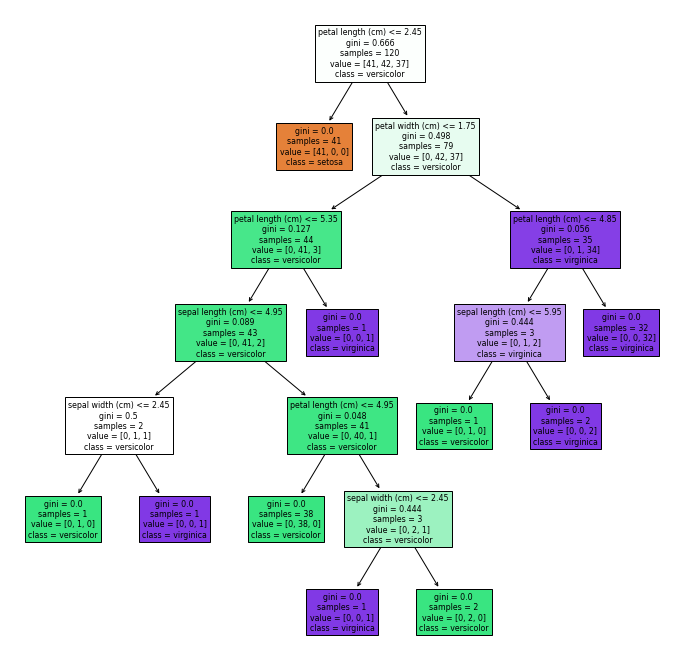

In [45]:
plt.figure(figsize=(12,12))
plot_tree(dtc, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

###### 제약 조건 부여
 - max_depth = 3

In [46]:
dtc2 = DecisionTreeClassifier(max_depth=3,random_state = 156)
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

In [47]:
export_graphviz(dtc2, out_file = 'tree2.dot', feature_names=iris.feature_names, class_names=iris.target_names,
               impurity = True, filled = True)

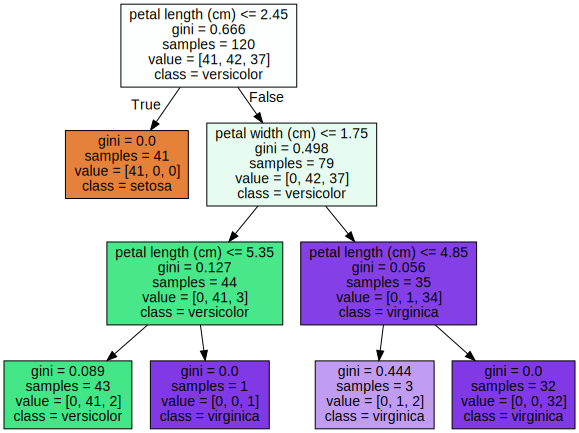

In [48]:
with open('tree2.dot') as file:
  dot_graph = file.read()
graphviz.Source(dot_graph)

- min_samples_split =4

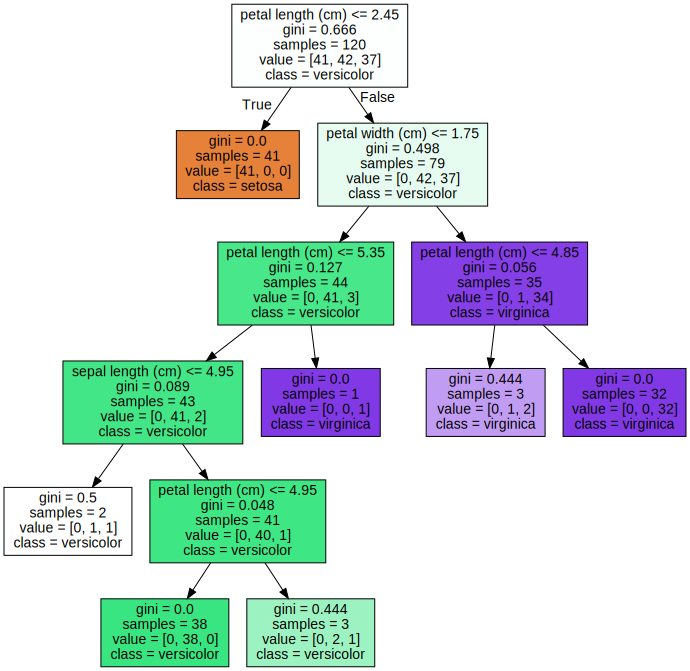

In [49]:
dtc3 = DecisionTreeClassifier(min_samples_split=4,random_state = 156)
dtc3.fit(X_train, y_train)

export_graphviz(dtc3, out_file = 'tree3.dot', feature_names=iris.feature_names, class_names=iris.target_names,
               impurity = True, filled = True)

with open('tree3.dot') as file:
  dot_graph = file.read()
graphviz.Source(dot_graph)

- min_samples_leaf = 2

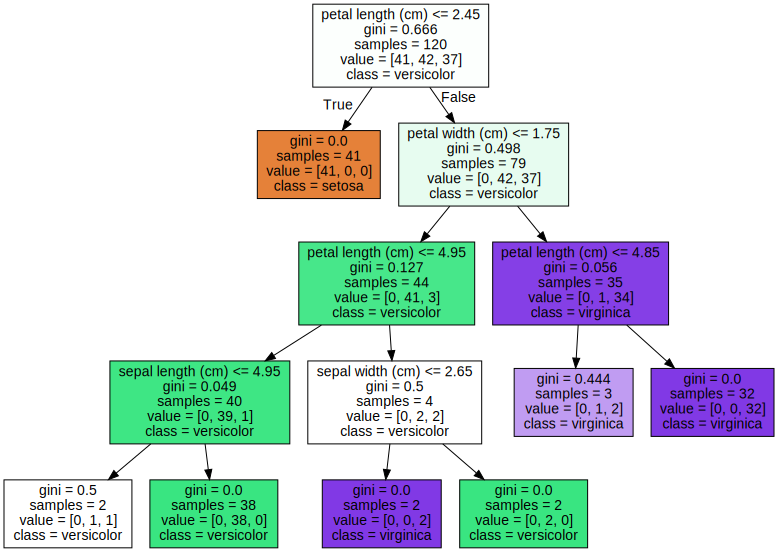

In [50]:
dtc4 = DecisionTreeClassifier(min_samples_leaf = 2,random_state = 156)
dtc4.fit(X_train, y_train)

export_graphviz(dtc4, out_file = 'tree4.dot', feature_names=iris.feature_names, class_names=iris.target_names,
               impurity = True, filled = True)

with open('tree4.dot') as file:
  dot_graph = file.read()
graphviz.Source(dot_graph)

- 모델 비교

In [51]:
dtc.score(X_test, y_test), dtc2.score(X_test, y_test), dtc3.score(X_test, y_test), dtc4.score(X_test, y_test)
# 제약 조건을 넣어도 그렇게까지 정확도 차이는 안 남

(0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333)

###### 학습된 모델이 제공하는 정보

- Feature importance

In [52]:
dtc.feature_importances_

array([0.02749093, 0.02920926, 0.54511905, 0.39818075])

In [53]:
dtc2.feature_importances_

array([0.        , 0.        , 0.57439539, 0.42560461])

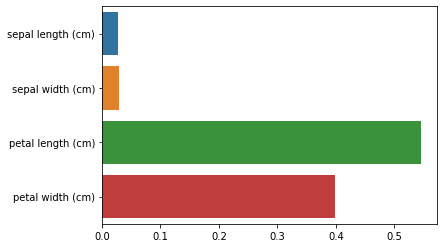

In [54]:
import seaborn as sns
sns.barplot(x=dtc.feature_importances_, y=iris.feature_names)
plt.show()